# About Dataset

### The dataset contains information on the highest grossing movies of 2022.

## COLUMN DESCRIPTION

####    'Rank': rank of the movie
####    'Release': release date of the movie
####    'Gross': domestic gross of the movie
####    'max_th': maximum number of theaters the movie was released in
####    'Opening': gross on opening weekend
####    'perc_tot_gr': domestic percentage of the total gross
####    'open_th': number of theaters the movie opened in
####    'Open': opening date
####    'Close': closing date
####    'Distributor': name of the distributor
####    'int_gross': international gross
####    'world_gross': worldwide gross


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler,RobustScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df=pd.read_csv("C:\\Users\\USER\\DA\\Data Sets\\PROJECT DATASETS\\highest_gr_movies_2022.csv")
df

,Rank,Release,Gross,max_th,Opening,perc_tot_gr,open_th,Open,Close,Distributor,int_gross,world_gross
0,1,Top Gun: Maverick,718732821,4751,126707459,17.6,4735,2022-05-27,2022-12-16,Paramount Pictures,7.700000e+08,1488732821
1,2,Avatar: The Way of Water,636955746,4340,134100226,21.1,4202,2022-12-16,NaN,20th Century Studios,1.539273e+09,2176229105
2,3,Black Panther: Wakanda Forever,453474324,4396,181339761,40.0,4396,2022-11-11,NaN,Walt Disney Studios Motion Pictures,3.892767e+08,842750982
3,4,Doctor Strange in the Multiverse of Madness,411331607,4534,187420998,45.6,4534,2022-05-06,NaN,Walt Disney Studios Motion Pictures,5.444442e+08,955775804
4,5,Jurassic World: Dominion,376851080,4697,145075625,38.5,4676,2022-06-10,2022-09-23,Universal Pictures,6.251270e+08,1001978080
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Mad God,325042,37,8416,2.6,2,2022-06-10,NaN,IFC Films,3.250420e+05,8416
196,197,Clean,318877,254,162098,50.8,254,2022-01-28,NaN,IFC Films,3.188770e+05,162098
197,198,Waterman,316848,44,65753,20.8,13,2022-04-01,NaN,Purdie Distribution,1.998600e+04,336834
198,199,Meet Me in the Bathroom,307000,157,86071,28.0,4,2022-11-04,NaN,Utopia,3.070000e+05,86071


In [3]:
df.drop("Rank",axis=1,inplace=True)

In [4]:
df

,Release,Gross,max_th,Opening,perc_tot_gr,open_th,Open,Close,Distributor,int_gross,world_gross
0,Top Gun: Maverick,718732821,4751,126707459,17.6,4735,2022-05-27,2022-12-16,Paramount Pictures,7.700000e+08,1488732821
1,Avatar: The Way of Water,636955746,4340,134100226,21.1,4202,2022-12-16,NaN,20th Century Studios,1.539273e+09,2176229105
2,Black Panther: Wakanda Forever,453474324,4396,181339761,40.0,4396,2022-11-11,NaN,Walt Disney Studios Motion Pictures,3.892767e+08,842750982
3,Doctor Strange in the Multiverse of Madness,411331607,4534,187420998,45.6,4534,2022-05-06,NaN,Walt Disney Studios Motion Pictures,5.444442e+08,955775804
4,Jurassic World: Dominion,376851080,4697,145075625,38.5,4676,2022-06-10,2022-09-23,Universal Pictures,6.251270e+08,1001978080
...,...,...,...,...,...,...,...,...,...,...,...
195,Mad God,325042,37,8416,2.6,2,2022-06-10,NaN,IFC Films,3.250420e+05,8416
196,Clean,318877,254,162098,50.8,254,2022-01-28,NaN,IFC Films,3.188770e+05,162098
197,Waterman,316848,44,65753,20.8,13,2022-04-01,NaN,Purdie Distribution,1.998600e+04,336834
198,Meet Me in the Bathroom,307000,157,86071,28.0,4,2022-11-04,NaN,Utopia,3.070000e+05,86071


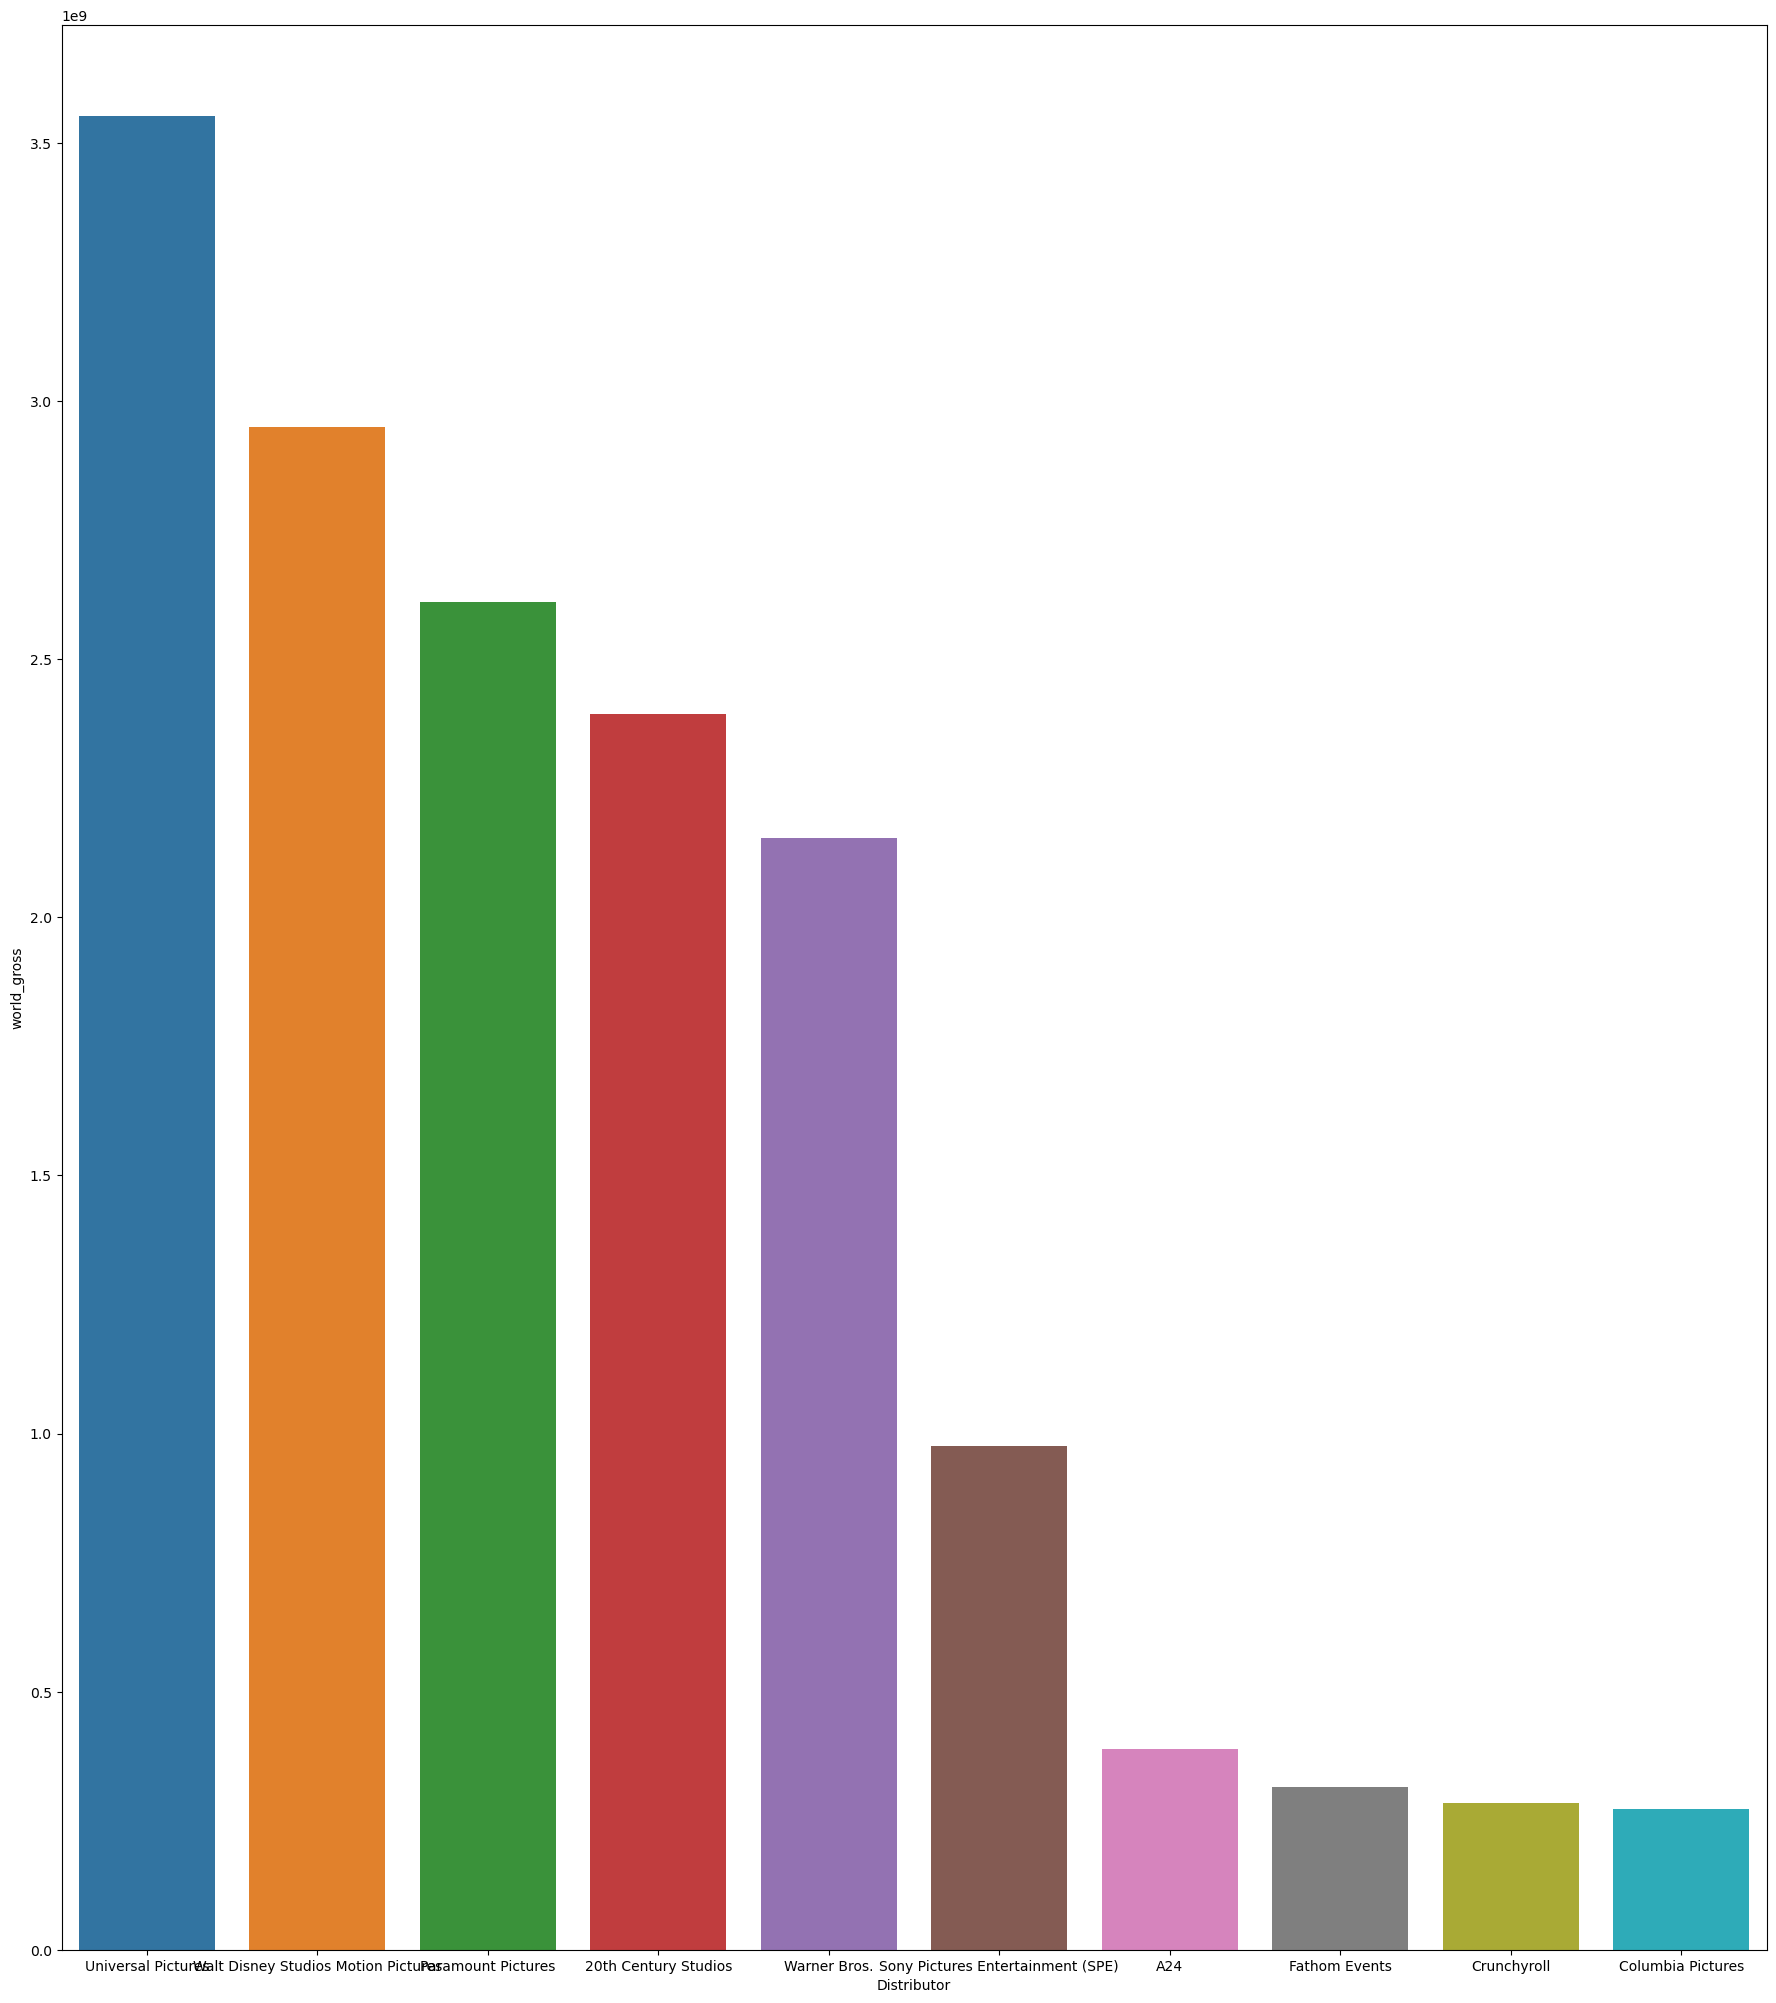

In [5]:
plt.figure(figsize=(22,25))
dataa= df.groupby('Distributor')[['world_gross']].sum().reset_index().sort_values('world_gross',ascending=False)
sns.barplot(data=dataa,x=dataa['Distributor'][:10],y=dataa['world_gross']);


### Universal Pictures are the Distributor having high world gross

## List of movies distributed by Universal pictures

In [6]:
df[df["Distributor"]=="Universal Pictures"] 

,Release,Gross,max_th,Opening,perc_tot_gr,open_th,Open,Close,Distributor,int_gross,world_gross
4,Jurassic World: Dominion,376851080,4697,145075625,38.5,4676,2022-06-10,2022-09-23,Universal Pictures,625127000.0,1001978080
5,Minions: The Rise of Gru,369695210,4427,107010140,28.9,4391,2022-07-01,NaN,Universal Pictures,569933000.0,939628210
10,Puss in Boots: The Last Wish,151221725,4121,12429515,8.2,4099,2022-12-21,NaN,Universal Pictures,217884000.0,369105725
13,Nope,123277080,3807,44366910,36.0,3785,2022-07-22,2022-10-06,Universal Pictures,47958512.0,171235592
18,The Bad Guys,97233630,4042,23950245,24.6,4008,2022-04-22,2022-11-17,Universal Pictures,152928648.0,250162278
22,The Black Phone,90123230,3156,23633220,26.2,3150,2022-06-24,2022-09-23,Universal Pictures,71317512.0,161440742
26,Ticket to Paradise,68275985,4066,16509095,24.2,3543,2022-10-21,NaN,Universal Pictures,99818878.0,168094863
28,Halloween Ends,64079860,3901,40050355,62.5,3901,2022-10-14,2022-11-17,Universal Pictures,40107000.0,104186860
32,Violent Night,49761525,3723,13450240,27.0,3682,2022-12-02,NaN,Universal Pictures,25947000.0,75708525
44,Beast,31846530,3754,11575855,36.3,3743,2022-08-19,2022-10-14,Universal Pictures,27249279.0,59095809


In [7]:
df.isnull().sum()

Release          0
Gross            0
max_th           0
Opening          0
perc_tot_gr      0
open_th          0
Open             0
Close          155
Distributor      0
int_gross        3
world_gross      0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
le=LabelEncoder()

In [10]:
df["Release"]=le.fit_transform(df["Release"])
df["Open"]=le.fit_transform(df["Open"])
df["Close"]=le.fit_transform(df["Close"])
df["Distributor"]=le.fit_transform(df["Distributor"])

In [11]:
df

,Release,Gross,max_th,Opening,perc_tot_gr,open_th,Open,Close,Distributor,int_gross,world_gross
0,40,718732821,4751,126707459,17.6,4735,9,27,7,770000000.0,1488732821
4,19,376851080,4697,145075625,38.5,4676,10,17,14,625127000.0,1001978080
7,37,343256830,4375,144165107,42.0,4375,13,21,16,417671251.0,760928081
8,29,190872904,4258,72105176,37.8,4234,4,11,7,211783942.0,402656846
9,4,168152111,4402,67004323,39.8,4402,29,0,17,224800000.0,392952111
11,11,151040048,3932,31211579,20.7,3906,12,21,17,136300000.0,287340048
13,23,123277080,3807,44366910,36.0,3785,15,19,14,47958512.0,171235592
14,21,118307188,4255,50577961,42.8,4255,11,15,16,108118232.0,226425420
15,28,105935048,3659,22609925,21.3,3645,26,27,7,110200000.0,216135048
16,35,105344029,4283,30453269,28.9,4253,2,8,7,85500000.0,190844029


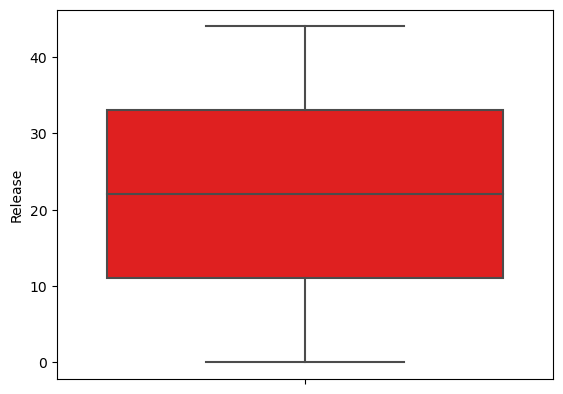

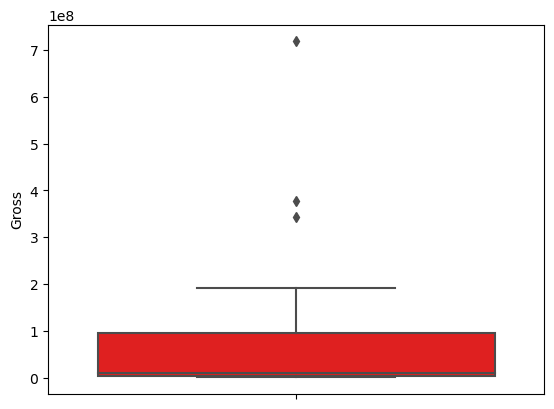

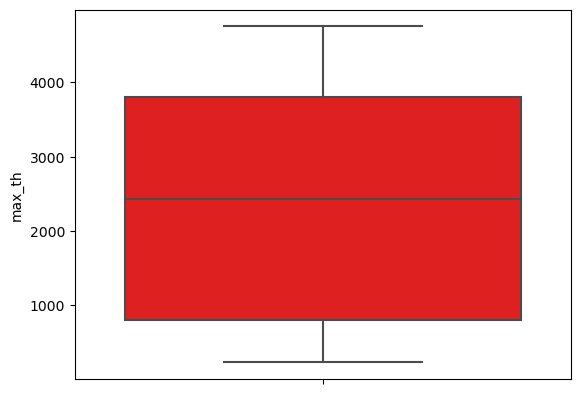

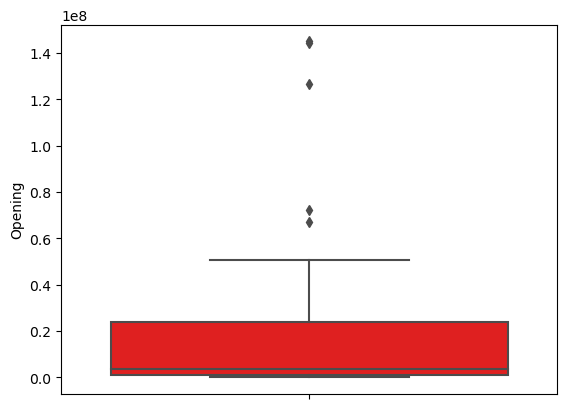

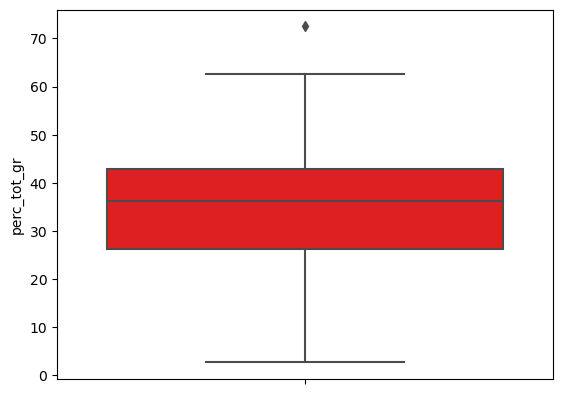

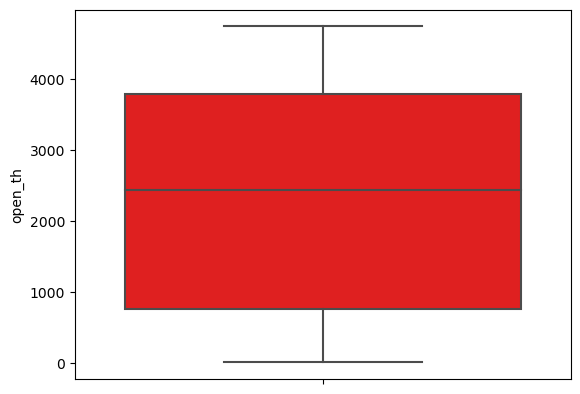

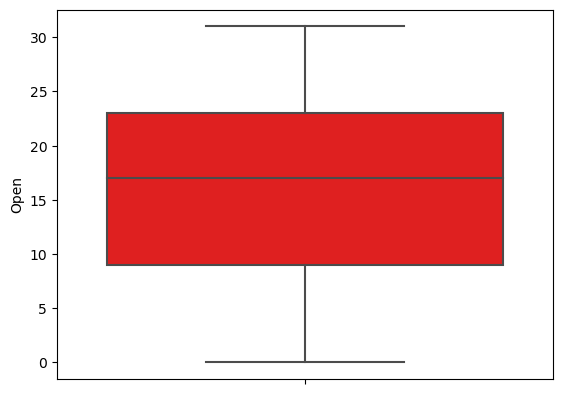

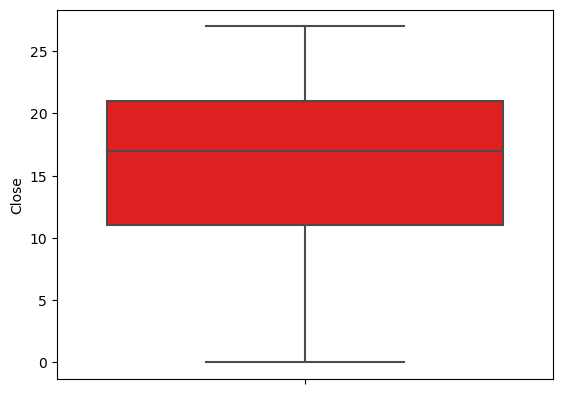

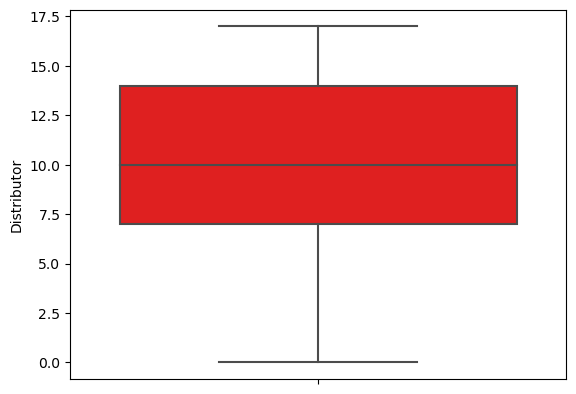

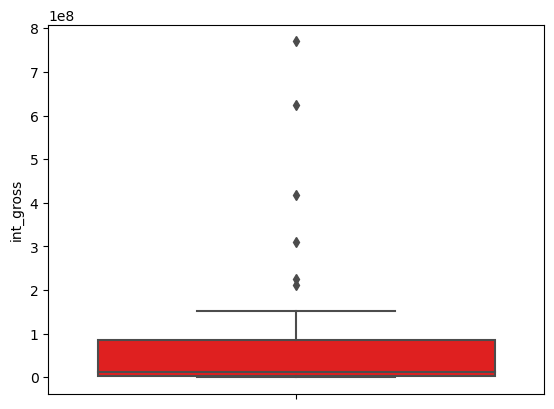

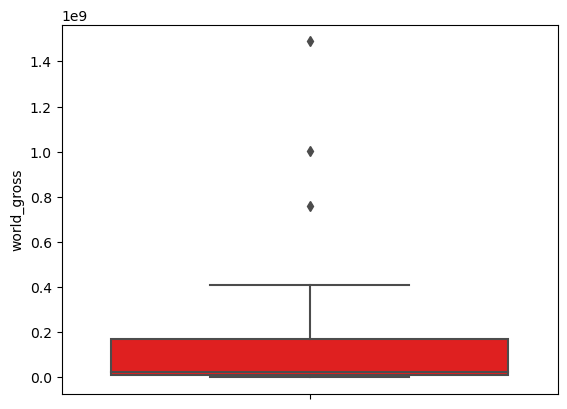

In [12]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color="red")
        plt.show()

In [13]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL


for column in df.columns:
    if df[column].dtype != "object":
        UL, LL = outlier_limit(df[column])
        df[column] = np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

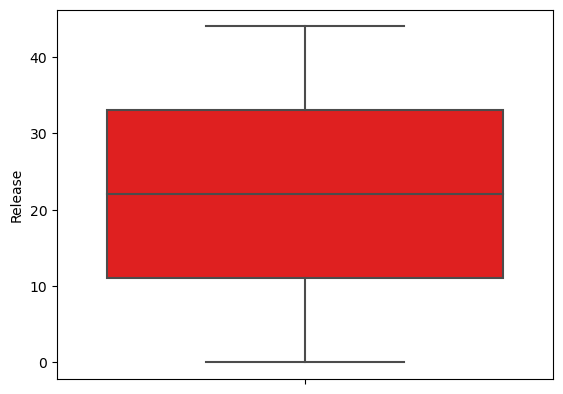

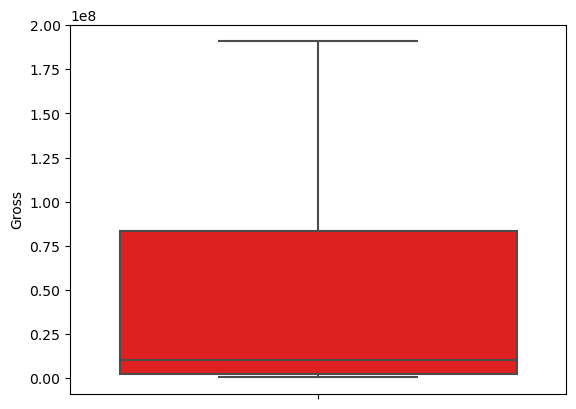

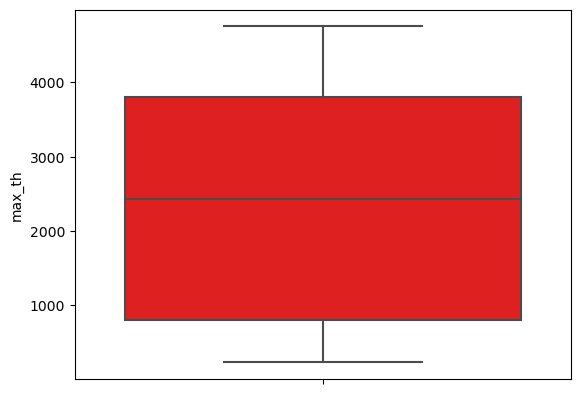

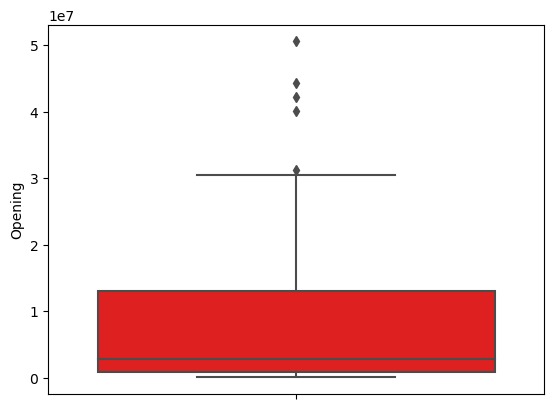

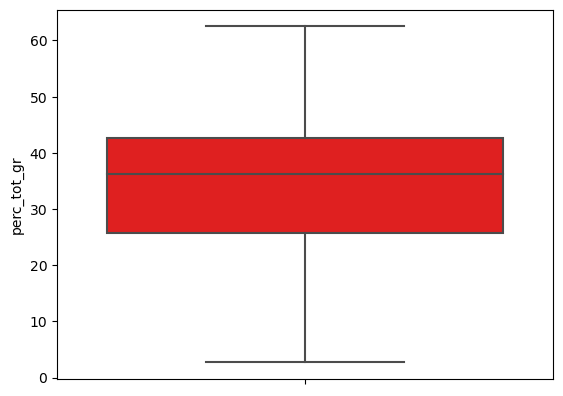

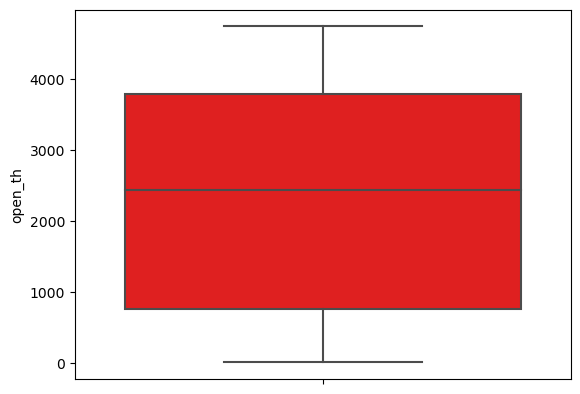

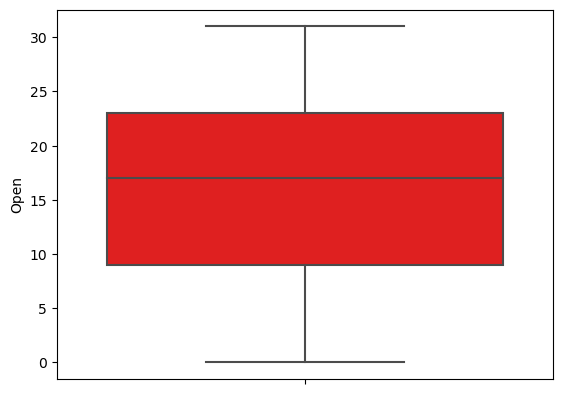

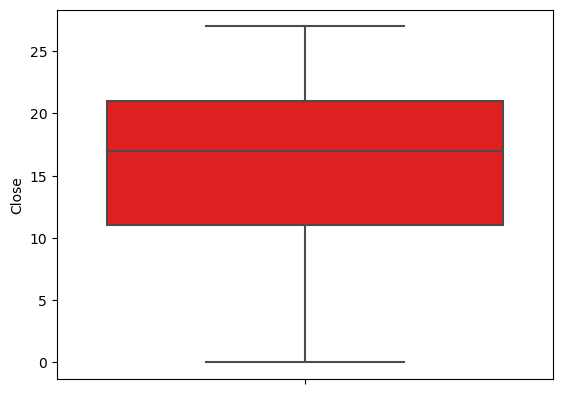

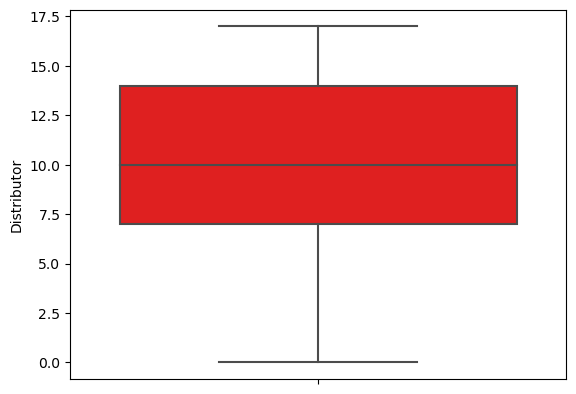

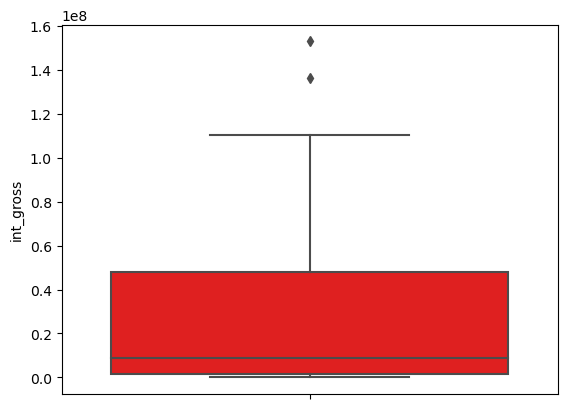

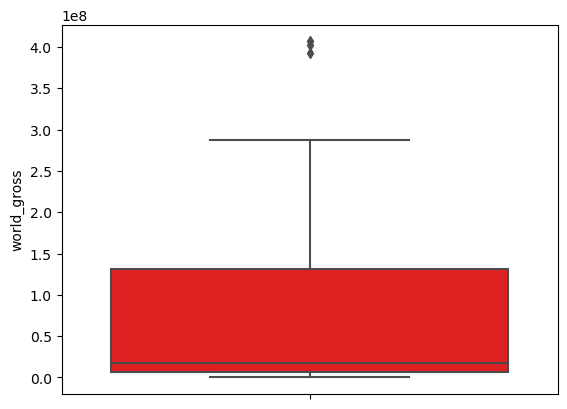

In [14]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color="red")
        plt.show()

In [15]:
df.isnull().sum()

Release        0
Gross          3
max_th         0
Opening        5
perc_tot_gr    1
open_th        0
Open           0
Close          0
Distributor    0
int_gross      6
world_gross    3
dtype: int64

In [16]:
df.dropna(inplace=True)

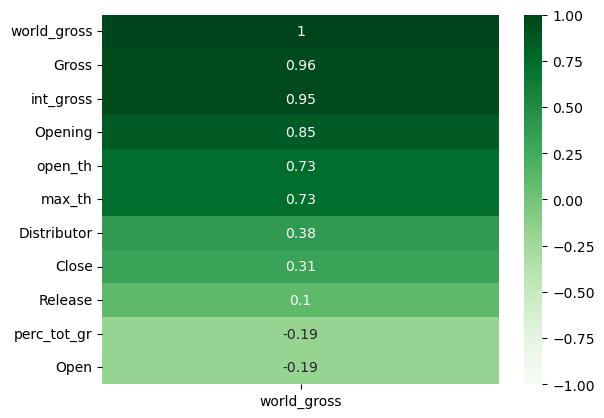

In [17]:
sns.heatmap(df.corr()[["world_gross"]].sort_values(by="world_gross", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Greens");

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 11 to 192
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Release      38 non-null     float64
 1   Gross        38 non-null     float64
 2   max_th       38 non-null     float64
 3   Opening      38 non-null     float64
 4   perc_tot_gr  38 non-null     float64
 5   open_th      38 non-null     float64
 6   Open         38 non-null     float64
 7   Close        38 non-null     float64
 8   Distributor  38 non-null     float64
 9   int_gross    38 non-null     float64
 10  world_gross  38 non-null     float64
dtypes: float64(11)
memory usage: 3.6 KB


In [19]:
x=df[["Distributor","open_th","max_th","Opening","Gross","int_gross"]].values
y=df[["world_gross"]].values

In [20]:
sc=StandardScaler()

In [21]:
x=sc.fit_transform(x)

In [22]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor()
}

In [23]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  2582298.031936846
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  2572484.627718537
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  3942263.182612321
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  20747369.55681423
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  18259234.637427673
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  16786426.35117408
***************************************************

In [24]:
ls=RandomForestRegressor()

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [26]:
ls.fit(x_train, y_train)

RandomForestRegressor()

In [27]:
print("model trained with {}".format(ls))
training_score = ls.score(x_train, y_train)*100
testing_score = ls.score(x_test, y_test)*100
score = r2_score(y_test, ls.predict(x_test))*100
mae = mean_absolute_error(y_test, ls.predict(x_test))
mse = mean_squared_error(y_test, ls.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with RandomForestRegressor()
r2score:  91.65694091589779
training_score:  99.18489132133541
testing_score:  91.65694091589779
mae:  5557577.766249999
mse:  47313327610644.44
rmse_test:  6878468.405876735


In [28]:
y_pred = ls.predict(x)

In [29]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,287340048.0,2.590472e+08
1,171235592.0,1.680130e+08
2,226425420.0,2.185380e+08
3,216135048.0,2.067174e+08
4,190844029.0,1.955262e+08
5,250162278.0,2.342798e+08
6,140230760.0,1.505032e+08
7,161440742.0,1.558434e+08
8,104186860.0,1.232539e+08
9,59095809.0,5.515304e+07


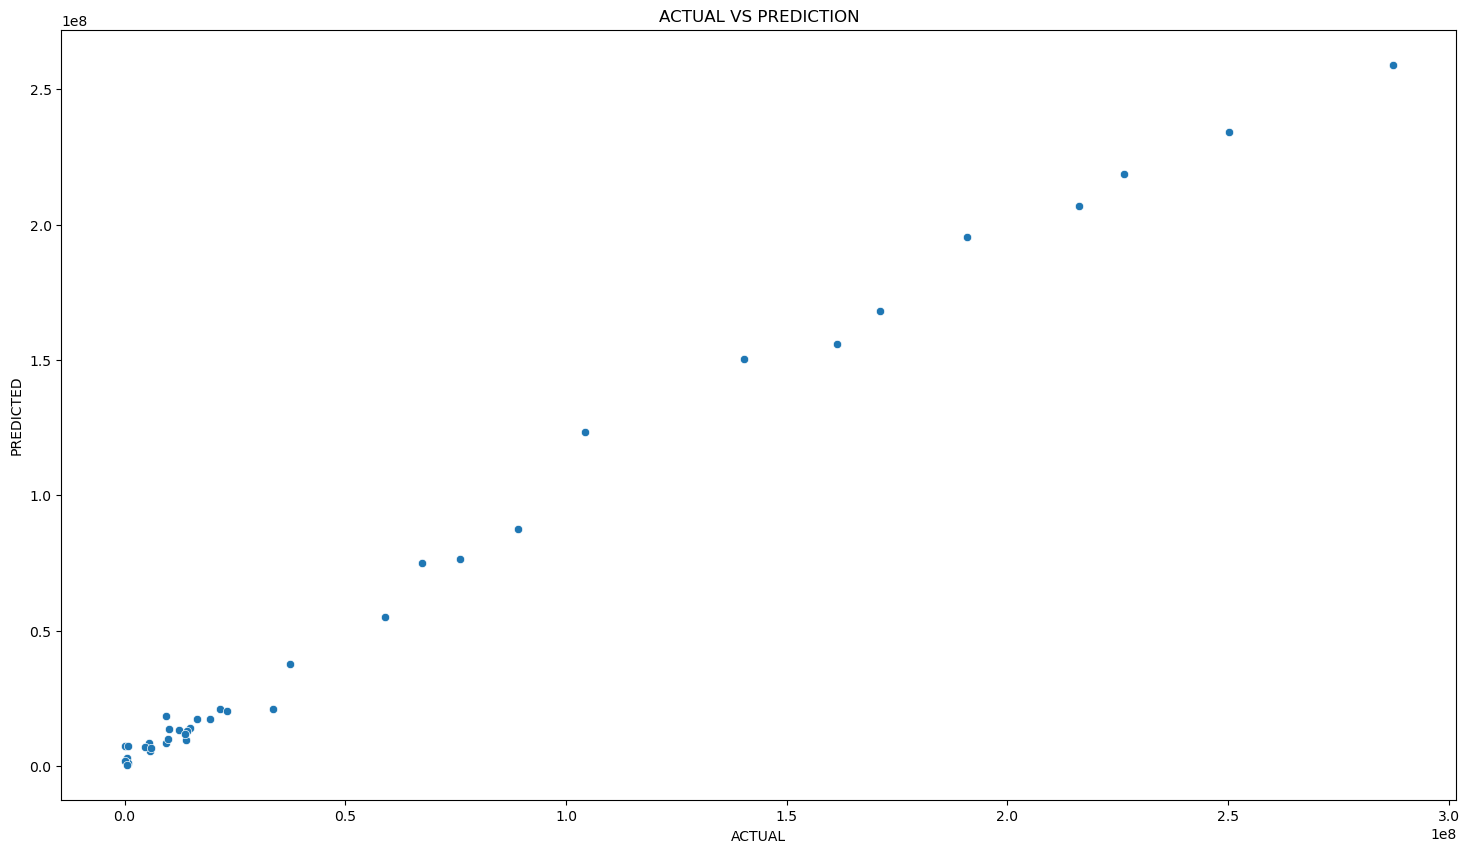

In [30]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()